In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pylab as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
## Loading the data
train = pd.read_csv(r"Path_to\titanic_data.csv")

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


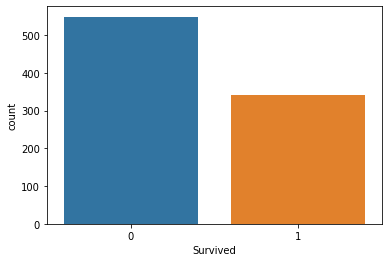

In [11]:
ax = sns.countplot(x="Survived", data=train)

In [88]:
## Let's re-index the dataframe on the passenger id 
train.set_index('PassengerId', inplace=True, drop = True)

In [13]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
## A quick model "quick and dirty"

In [9]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [10]:
X, y = parse_model_0(train.copy())

Cross-validation

In [11]:
def compute_score(clf, X,y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [12]:
## let's initialize a model 
lr = LogisticRegression()

In [13]:
compute_score(lr, X, y)

0.6746092524009792

# Variables study

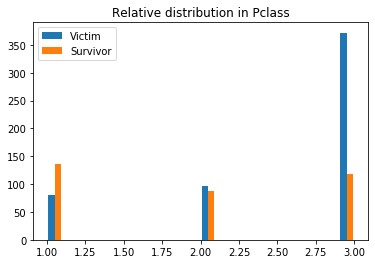

In [17]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=['Victim', 'Survivor'], bins = bins) # color = ['', 'b']
    plt.legend(loc='upper left')
    plt.title('Relative distribution in %s' %feature)
    plt.show()
    
plot_hist('Pclass')

In [18]:
def parse_model_1(X): 
    target = X.Survived
#    class_dummies = pd.get_dummies(X['Pclass'], prefix= ['split_Pclass_1','split_Pclass_2','split_Pclass_3'])
    class_dummies = pd.get_dummies(X['Pclass'], prefix= 'split_')
    X = X.join(class_dummies)
    to_del = ['Name', 'Sex', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del : del X[col]
    return X, target

In [19]:
X, y = parse_model_1(train.copy())

In [20]:
X

,Pclass,SibSp,Parch,Fare,split__1,split__2,split__3
PassengerId,,,,,,,
1,3,1,0,7.2500,0,0,1
2,1,1,0,71.2833,1,0,0
3,3,0,0,7.9250,0,0,1
4,1,1,0,53.1000,1,0,0
5,3,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...
887,2,0,0,13.0000,0,1,0
888,1,0,0,30.0000,1,0,0
889,3,1,2,23.4500,0,0,1


In [21]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [22]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [23]:
lr = LogisticRegression()

In [24]:
compute_score(lr, X, y)

0.6925805034210031

We can observe an improvement in the score.

Let's see the weight that the logistic regression model is giving to each feature

In [29]:
lr = LogisticRegression()
lr.fit(X, y)
lr.coef_

array([[-0.41398572, -0.14921056,  0.23546751,  0.00660484,  0.095782  ,
         0.22430577, -0.31945975]])

In [30]:
lr.coef_

array([[-0.41398572, -0.14921056,  0.23546751,  0.00660484,  0.095782  ,
         0.22430577, -0.31945975]])

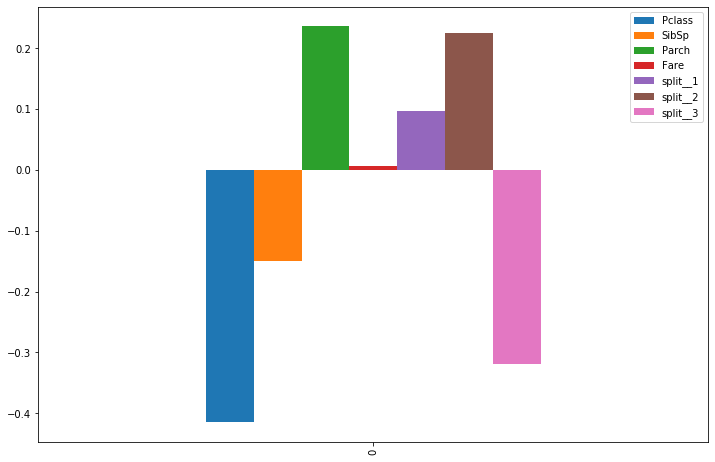

In [32]:
## Let's visualize it
pd.DataFrame(data=lr.coef_, columns = X.columns).plot.bar(figsize=(12,8))

# Let's add more features like "sex" and "Pclass"

In [33]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix = 'Split_'+dum)
        for col in split_temp: 
            X[col] = split_temp[col]
#            print(col)
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    to_del = ['Name', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del : del X[col]
    return X, target

In [34]:
X, y = parse_model_2(train.copy())

In [35]:
X

,Age,SibSp,Parch,Fare,Split_Pclass_1,Split_Pclass_2,Split_Pclass_3,Split_Sex_female,Split_Sex_male
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1
2,38.0,1,0,71.2833,1,0,0,1,0
3,26.0,0,0,7.9250,0,0,1,1,0
4,35.0,1,0,53.1000,1,0,0,1,0
5,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1
888,19.0,0,0,30.0000,1,0,0,1,0
889,28.0,1,2,23.4500,0,0,1,1,0


In [36]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [37]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [38]:
lr = LogisticRegression()

In [41]:
compute_score(lr, X, y)

0.7867553825874083

We can see the add of some features has increased the score of the model

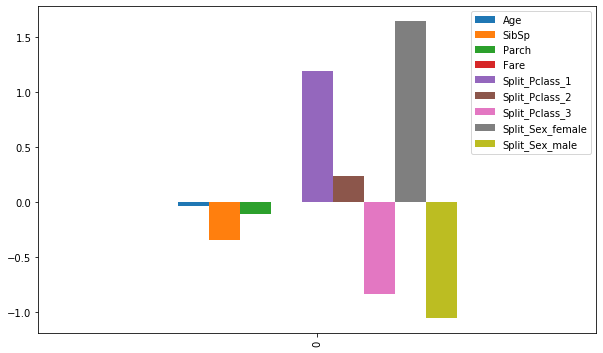

In [45]:
lr = LogisticRegression()
lr.fit(X, y)
## Let's visualize it
pd.DataFrame(data=lr.coef_, columns = X.columns).plot.bar(figsize=(10,6))

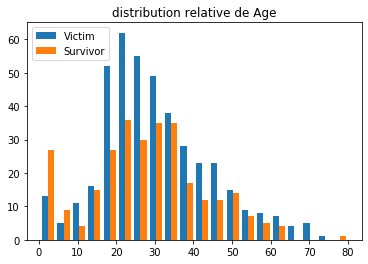

In [62]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=['Victim', 'Survivor'], bins = bins) # color = ['', 'b']
    plt.legend(loc='upper left')
    plt.title('Relative distribution in %s' %feature)
    plt.show()

plot_hist('Age')

In [47]:
X['is_child'] = X.Age<8

lr = LogisticRegression()

compute_score(lr, X, y)

0.7968489109283786

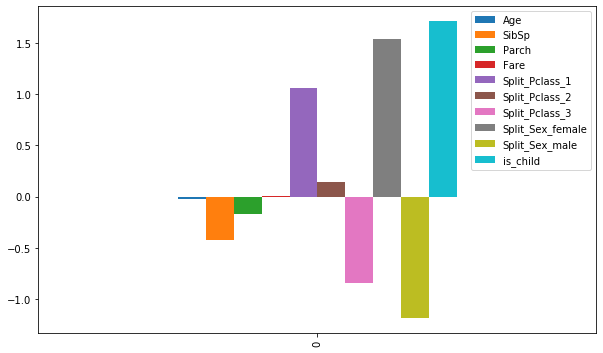

In [49]:
lr = LogisticRegression()
lr.fit(X, y)
## Let's visualize it
pd.DataFrame(data=lr.coef_, columns = X.columns).plot.bar(figsize=(10,6))

We can see clearly that an important weight has been given to the variable "is_child" and shows the importance of the variable "age"

# Let's Apply Random Forest 

In [50]:
##let's initialize the model 
rf = RandomForestClassifier()

In [51]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [52]:
def clf_importance(X, clf):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    pl.title("Feature importance")
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]), tree.feature_importances_[indices], "r")
        pl.plot(range(X.shape[1]), importances[indices], "b")
    pl.show()
    for f in range(X.shape[1]):
        print("%d. feature : %s (%f)" %(f+1, X.columns[indices[f]], importances[indices[f]]))

In [53]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

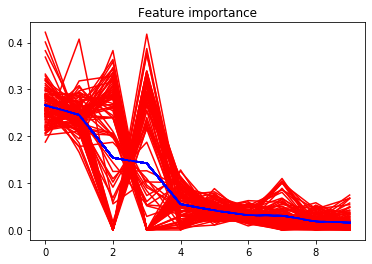

1. feature : Fare (0.266313)
2. feature : Age (0.245560)
3. feature : Split_Sex_male (0.153883)
4. feature : Split_Sex_female (0.142197)
5. feature : Split_Pclass_3 (0.054812)
6. feature : SibSp (0.041622)
7. feature : Parch (0.031514)
8. feature : Split_Pclass_1 (0.030272)
9. feature : is_child (0.018189)
10. feature : Split_Pclass_2 (0.015637)


In [54]:
clf_importance(X, rf)

In [55]:
compute_score(rf, X, y)

0.8092586780490867

## Using the other variables like "name" and "cabin"

In [28]:
train.shape

(891, 11)

In [27]:
train.Cabin.map(lambda x: x[0] if not pd.isnull(x) else -1)

PassengerId
1      -1
2       C
3      -1
4       C
5      -1
       ..
887    -1
888     B
889    -1
890     C
891    -1
Name: Cabin, Length: 891, dtype: object

In [16]:
def parse_model_4(X):
    target = X.Survived
    X['title'] = X.Name.map(lambda x: x.split(',')[1].split(',')[0])
    X['surname'] = X.Name.map(lambda x: '(' in x)
    X['Cabin'] = X.Cabin.map(lambda x: x[0] if not pd.isnull(x) else -1)

    to_dummy = ['Pclass', 'Sex', 'title', 'Embarked', 'Cabin']
    for dum in to_dummy:
        split_feature = pd.get_dummies(X[dum], prefix='split_'+dum)
        X = X.join(split_feature)
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    X['is_child'] = X.Age < 8
    to_del = ['Name', 'Survived', 'Ticket']
    for col in to_del : del X[col]
    return X, target 

In [17]:
X, y = parse_model_4(train.copy())

In [23]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [59]:
lr = LogisticRegression()
rf = RandomForestClassifier()

In [60]:
compute_score(lr, X, y)

0.8226853304877283

In [61]:
compute_score(rf, X, y)

0.8327851358985626

We can observe that the models are performing better with these new features.

In [21]:
## Let's balance the target data
rf = RandomForestClassifier(class_weight={0:1, 1:2})

In [24]:
compute_score(rf, X, y)

0.8282907538760907

By balancing the target data we can observe a slight decrease in the score.

In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
train["Ticket"].astype(str).apply(lambda x: len(x))

PassengerId
1       9
2       8
3      16
4       6
5       6
       ..
887     6
888     6
889    10
890     6
891     6
Name: Ticket, Length: 891, dtype: int64

In [30]:
train[["Pclass", "Ticket"]]

,Pclass,Ticket
PassengerId,,
1,3,A/5 21171
2,1,PC 17599
3,3,STON/O2. 3101282
4,1,113803
5,3,373450
...,...,...
887,2,211536
888,1,112053
889,3,W./C. 6607


In [78]:
a = train["Ticket"].astype(str).apply(lambda x: x[-1:])
a

PassengerId
1      1
2      9
3      2
4      3
5      0
      ..
887    6
888    3
889    7
890    9
891    6
Name: Ticket, Length: 891, dtype: object

In [79]:
def ma(x):
    if x == "E":
        x = 0
        return x 
    else: 
        x = x
        return x

In [80]:
a = a.apply(ma)

In [82]:
a.astype(int)

PassengerId
1      1
2      9
3      2
4      3
5      0
      ..
887    6
888    3
889    7
890    9
891    6
Name: Ticket, Length: 891, dtype: int32

In [92]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train["Ticket"].isnull().sum()

0

In [157]:
def parse_model_5(X):
    target = X.Survived
    X['title'] = X.Name.map(lambda x: x.split(',')[1].split(',')[0])
    X['surname'] = X.Name.map(lambda x: '(' in x)
    X['Cabin'] = X.Cabin.map(lambda x: x[0] if not pd.isnull(x) else -1)
    X['Ticket'] = X['Ticket'].astype(str).apply(lambda x: len(x))
    X['is_child'] = X.Age < 8

    to_dummy = ['Pclass', 'Sex', 'title', 'Embarked', 'Cabin', 'Ticket', 'surname', 'is_child']
    for dum in to_dummy:
        split_feature = pd.get_dummies(X[dum], prefix='split_'+dum)
        X = X.join(split_feature)
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    to_del = ['Name', 'Survived']
    for col in to_del : del X[col]
    return X, target 

In [158]:
X, y = parse_model_5(train.copy())

In [116]:
X

,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,split_title_ Capt. Edward Gifford,...,split_Ticket_12,split_Ticket_13,split_Ticket_15,split_Ticket_16,split_Ticket_17,split_Ticket_18,split_surname_False,split_surname_True,split_is_child_False,split_is_child_True
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,38.0,1,0,71.2833,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,35.0,1,0,53.1000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
5,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,0,13.0000,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
888,19.0,0,0,30.0000,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
889,28.0,1,2,23.4500,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [97]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [98]:
lr = LogisticRegression()
rf = RandomForestClassifier()

In [117]:
compute_score(lr, X, y)

0.8126106333563493

In [118]:
compute_score(rf, X, y)

0.8215742891218379

In [102]:
from sklearn.svm import SVC

In [129]:
svc = SVC(kernel='poly')

In [130]:
compute_score(svc, X, y)

0.6543594250204005

In [121]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [123]:
xgb = XGBClassifier(eval_metric='mlogloss')

In [124]:
compute_score(xgb, X, y)

0.8406503044378884

With XGBoost model we have the best score.

In [143]:
from sklearn.ensemble import AdaBoostClassifier

In [189]:
adb = AdaBoostClassifier()

In [145]:
compute_score(adb, X, y)

0.7980478312723621

## Evaluation on the test data

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [162]:
def parse_model_5(X):
    target = X.Survived
    X['title'] = X.Name.map(lambda x: x.split(',')[1].split(',')[0])
    X['surname'] = X.Name.map(lambda x: '(' in x)
    X['Cabin'] = X.Cabin.map(lambda x: x[0] if not pd.isnull(x) else -1)
    X['Ticket'] = X['Ticket'].astype(str).apply(lambda x: len(x))
    X['is_child'] = X.Age < 8

    to_dummy = ['Pclass', 'Sex', 'title', 'Embarked', 'Cabin', 'Ticket', 'surname', 'is_child']
    for dum in to_dummy:
        split_feature = pd.get_dummies(X[dum], prefix='split_'+dum)
        X = X.join(split_feature)
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    to_del = ['Name', 'Survived']
    for col in to_del : del X[col]
    return X, target 

In [163]:
X, y = parse_model_5(train.copy())

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [166]:
pred_1 = xgb.predict(X_test)

In [168]:
acc_1 = accuracy_score(y_test, pred_1)
acc_1

0.7877094972067039

In [160]:
test.shape

(418, 11)

In [169]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [170]:
pred_2 = rf.predict(X_test)

In [171]:
acc_2 = accuracy_score(y_test, pred_2)
acc_2

0.8268156424581006

In [186]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
pred_3 = svc.predict(X_test)

In [188]:
acc_3 = accuracy_score(y_test, pred_3)
acc_3

0.6256983240223464

In [190]:
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [191]:
pred_4 = adb.predict(X_test)

In [193]:
acc_4 = accuracy_score(y_test, pred_4)
acc_4

0.8212290502793296

# Vote Classifier

In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [197]:
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier(eval_metric='mlogloss')

In [202]:
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('rf', rf_clf), ('knn', knn_clf), ('svc', svc_clf)], voting="hard")

In [203]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [204]:
for clf in (lr_clf, rf_clf, knn_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8044692737430168
RandomForestClassifier 0.8324022346368715
KNeighborsClassifier 0.7318435754189944
SVC 0.659217877094972
VotingClassifier 0.7597765363128491


This vote classifier is not suitable.

After all these experiences, the Random Forest is the best model !!!